In [86]:
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import PIL.Image as Image


## Load data

In [87]:
(train_examples, validation_examples), info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)
IMAGE_RES = 224
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

## Get the model mobilenet

In [88]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

In [89]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [90]:
feature_extractor.trainable = False

In [91]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


## Train the model

In [92]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 2
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 94s 1s/step - loss: 1.1213 - accuracy: 0.5616 - val_loss: 0.4532 - val_accuracy: 0.8583
Epoch 2/2
81/81 [==============================] - 86s 1s/step - loss: 0.4397 - accuracy: 0.8523 - val_loss: 0.3651 - val_accuracy: 0.8837


## Visualize training history

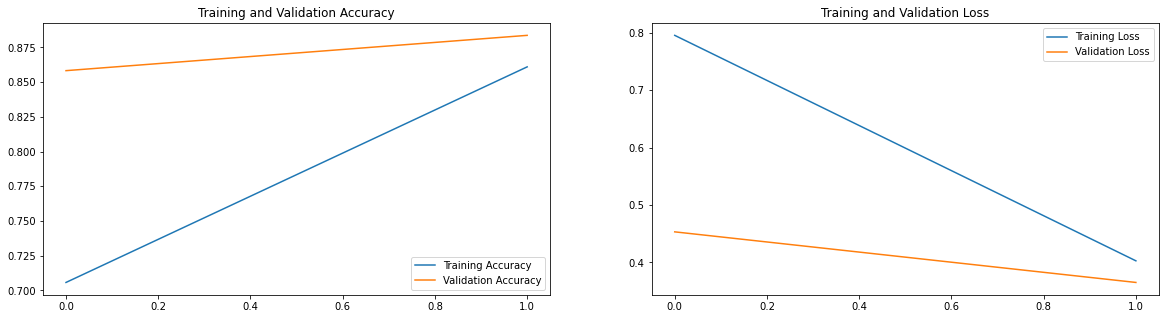

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [94]:
class_names = np.array(info.features['label'].names)
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [95]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dandelion', 'dandelion', 'tulips', 'sunflowers', 'tulips',
       'dandelion', 'daisy', 'tulips', 'daisy', 'tulips', 'dandelion',
       'roses', 'dandelion', 'daisy', 'roses', 'dandelion', 'dandelion',
       'dandelion', 'daisy', 'sunflowers', 'roses', 'sunflowers', 'roses',
       'tulips', 'tulips', 'sunflowers', 'daisy', 'dandelion',
       'sunflowers', 'sunflowers', 'daisy', 'daisy'], dtype='<U10')

In [96]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [0 0 2 3 2 0 1 2 1 2 0 4 0 1 4 0 0 0 1 3 4 1 4 2 2 3 1 0 3 2 1 1]
Predicted labels:  [0 0 2 3 2 0 1 2 1 2 0 4 0 1 4 0 0 0 1 3 4 3 4 2 2 3 1 0 3 3 1 1]


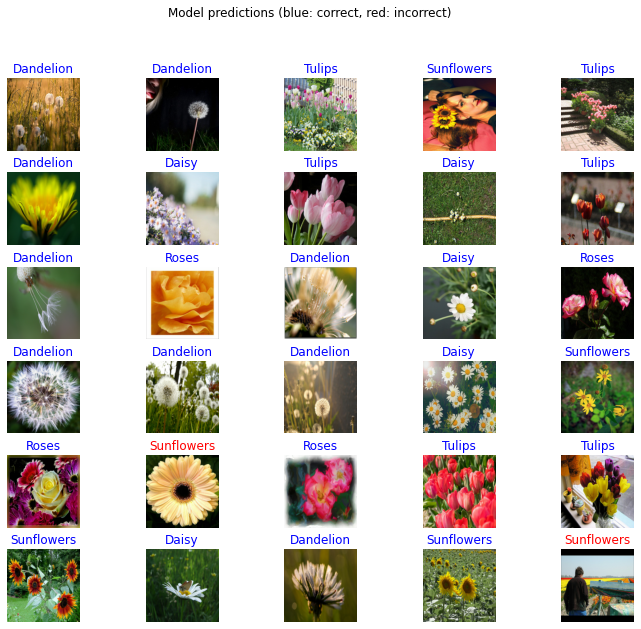

In [97]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

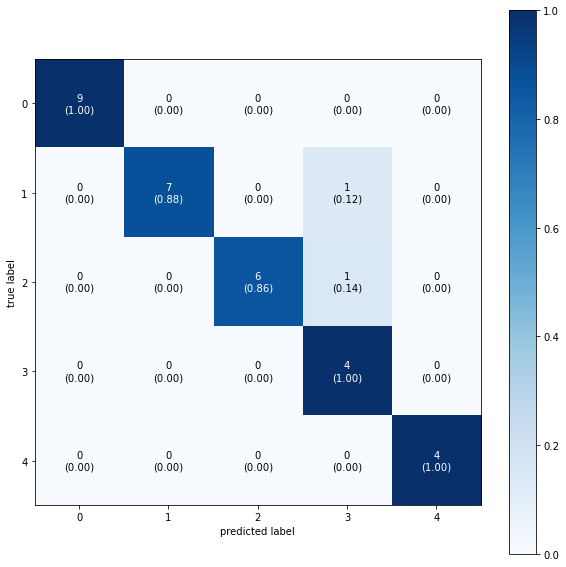

In [98]:

import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat =confusion_matrix(label_batch,predicted_ids)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),show_normed=True,colorbar=True)
plt.show()



# THe result from graph
traning accuracy increase the validation accracy increase which is good.
traning lose decrease the validation loss decrease which is good.
validation acuracy is 88 is a good number.

from the model prediction the there are two incrroect prediction both are sunflowers class .
from confustion matrix the  there are two incrroect prediction in class number four.

In [99]:
(train_examples, validation_examples), info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)
IMAGE_RES = 224
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

## Get the model inception_v3

In [100]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/3"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

In [101]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1001)


In [102]:
feature_extractor.trainable = False

In [103]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 5010      
Total params: 23,858,843
Trainable params: 5,010
Non-trainable params: 23,853,833
_________________________________________________________________


## Train the model

In [104]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 2
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 323s 4s/step - loss: 1.3929 - accuracy: 0.5684 - val_loss: 0.5830 - val_accuracy: 0.7956
Epoch 2/2
81/81 [==============================] - 312s 4s/step - loss: 0.4701 - accuracy: 0.8472 - val_loss: 0.5028 - val_accuracy: 0.8247


## Visualize training history

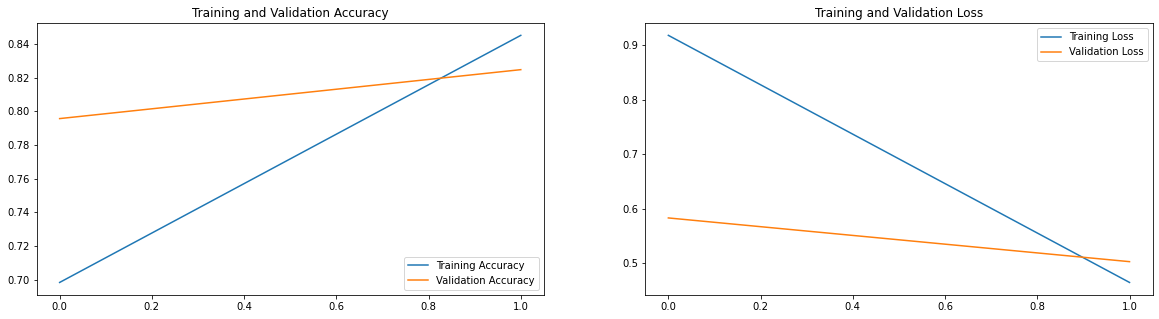

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [106]:
class_names = np.array(info.features['label'].names)
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [107]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dandelion', 'dandelion', 'tulips', 'roses', 'roses', 'dandelion',
       'roses', 'tulips', 'dandelion', 'tulips', 'dandelion', 'roses',
       'dandelion', 'daisy', 'roses', 'dandelion', 'dandelion',
       'dandelion', 'daisy', 'daisy', 'roses', 'daisy', 'roses', 'tulips',
       'tulips', 'sunflowers', 'daisy', 'dandelion', 'sunflowers',
       'tulips', 'daisy', 'daisy'], dtype='<U10')

In [108]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [0 0 2 3 2 0 1 2 1 2 0 4 0 1 4 0 0 0 1 3 4 1 4 2 2 3 1 0 3 2 1 1]
Predicted labels:  [0 0 2 4 4 0 4 2 0 2 0 4 0 1 4 0 0 0 1 1 4 1 4 2 2 3 1 0 3 2 1 1]


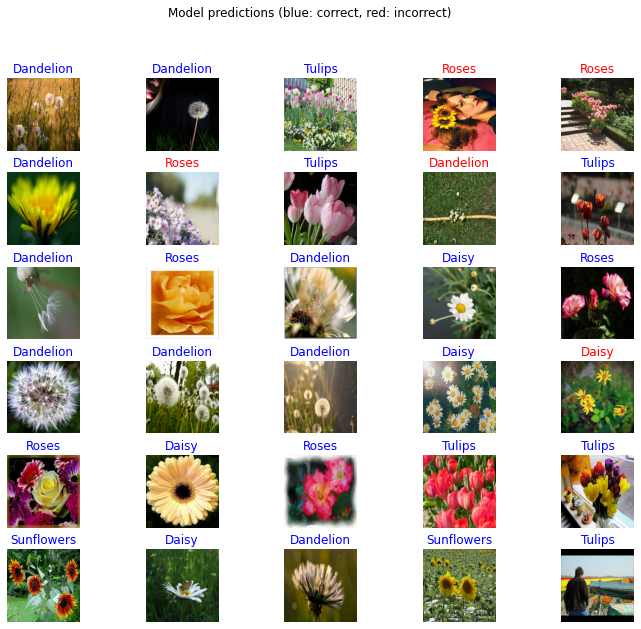

In [109]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

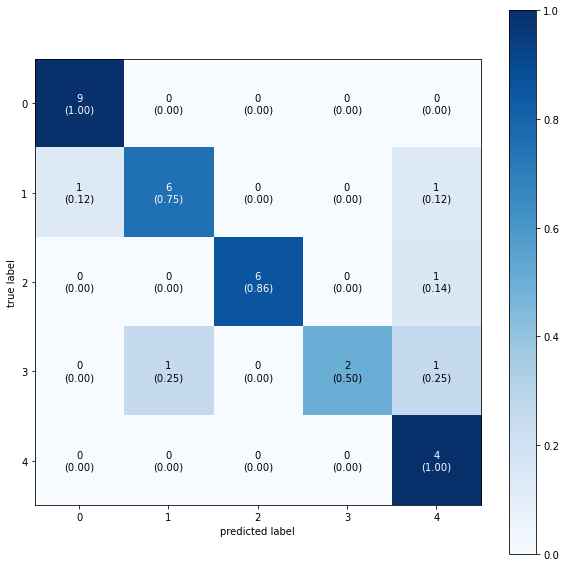

In [110]:

import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat =confusion_matrix(label_batch,predicted_ids)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),show_normed=True,colorbar=True)
plt.show()


# THe result from graph
traning accuracy increase the validation accracy doesnot increase after certain value which is overfitten.

traning lose decrease the validation loss doesnot decrease after certain value which is overfitten.

validation acuracy is 82 .

from the model prediction the there are five incrroect prediction three Roses class one Daisy class and one Dandelion.
from confustion matrix the  there are one incrorect in class one , one in class two too,three incorrect in class five>

# comparasion between mobilenet_v2 and inception_v3

## first training/validation accuracy and loss
  
mobilenet_v2:  loss: 0.4397 - accuracy: 0.8523 - val_loss: 0.3651 - val_accuracy: 0.8837

inception_v3:  loss: 0.4701 - accuracy: 0.8472 - val_loss: 0.5028 - val_accuracy: 0.8247

the result:     mobilenet_v2 is more accuracy than inception_v3 in both traning and validation.

## second confusion matrix for the output

mobilenet_v2:
from the model prediction the there are two incrroect prediction both are sunflowers class . from confustion matrix the there are two incrroect prediction in class number four.

inception_v3: 
from the model prediction the there are five incrroect prediction three Roses class one Daisy class and one Dandelion. from confustion matrix the there are one incrorect in class one , one in class two too,three incorrect in class five>